In [1]:
#IMPORTS
import tensorflow as tf
import numpy as np

from utils.coco_dataset_manager import *

from utils.custom_retinanet import *

2023-11-14 03:21:02.394716: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 03:21:02.440838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend


In [3]:
#LOAD DS

#Change this to your path
json_path = r"/remote_home/Thesis/annotations/instances_train2017.json"
save_path = r"train"
num_imgs = 75
download = True

cls_list = ['person','dog','cat','bus','car','truck','fire hydrant','motorcycle','airplane','train','boat','traffic light','street sign','stop sign','parking meter''bench']

coco_ds = CocoDSManager(json_path, save_path, max_samples=num_imgs, download=download, cls_list=cls_list)

train_dataset = coco_ds.train_ds
val_dataset = coco_ds.val_ds
test_ds = coco_ds.test_ds

loading annotations into memory...
Done (t=13.92s)
creating index...
index created!
LOADING 500 IMAGES


FileNotFoundError: [Errno 2] No such file or directory: 'train/000000262145.jpg'

In [6]:
#LOAD MODEL
num_classes = 80
min_confidence = .18
max_iou = .5

weight_pth = r"yolo/weights_epoch_"
epoch_num = "200"

resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone, min_confidence, max_iou)

model.load_weights(weight_pth+epoch_num).expect_partial()

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for retinanet/weights_epoch_131

[0.11821218 0.00272453 0.00478547 0.00373382 0.01098675 0.00522518
 0.00442986 0.01221698 0.0056355  0.00624875 0.00393261 0.00642053
 0.01299814 0.00635261 0.00298555 0.11275145 0.18764271 0.004265
 0.01065139 0.00745132 0.00221033 0.00567351 0.00681074 0.00372419
 0.00760694 0.02406862 0.0033957  0.00554933 0.00549789 0.00591861
 0.00218564 0.00217206 0.0094183  0.00406809 0.00879752 0.0073159
 0.00317632 0.00384826 0.01366983 0.00591752 0.00485621 0.00331614
 0.00100487 0.00800934 0.00164504 0.00824223 0.00536252 0.00688459
 0.01093771 0.00944656 0.00350204 0.00552349 0.00261727 0.00497828
 0.00412885 0.00180902 0.00324084 0.02297444 0.05213283 0.03043985
 0.00699918 0.01413321 0.00859436 0.00631316 0.00610337 0.0071559
 0.00526364 0.00345706 0.00358984 0.00304489 0.00384658 0.01868985
 0.0053718  0.00620768 0.0060937  0.00352482 0.01334342 0.00758385
 0.00460644 0.01434946]
1.0


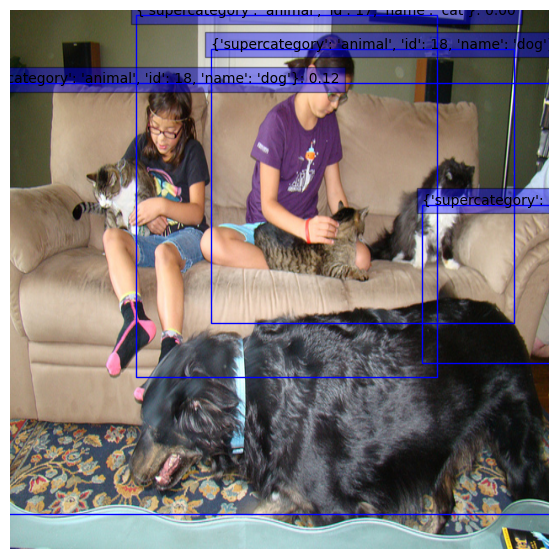

[0.1355419  0.00193985 0.00364731 0.00268833 0.00924631 0.00407883
 0.00328283 0.01076714 0.00450206 0.00475823 0.00283336 0.00530961
 0.01092784 0.00512904 0.00217028 0.1360822  0.23159528 0.0031615
 0.00936509 0.00612095 0.00153693 0.00447891 0.00556763 0.00276969
 0.00627418 0.02231819 0.00251863 0.00436254 0.00422735 0.00462824
 0.00149905 0.00149939 0.00811206 0.00300825 0.00739771 0.00589761
 0.00232689 0.00283468 0.01208395 0.00474647 0.00374102 0.00249248
 0.0006076  0.00636962 0.00109493 0.00676888 0.00432395 0.00553679
 0.00931942 0.00790696 0.00250263 0.00447301 0.00186401 0.00385069
 0.00307692 0.00120094 0.0023357  0.02186614 0.05538324 0.03164579
 0.00560865 0.01213131 0.00698676 0.0050383  0.00467992 0.00574027
 0.00427667 0.00255946 0.00267728 0.00213049 0.00285376 0.01722237
 0.00417443 0.0050555  0.00478856 0.00266056 0.01183663 0.00590518
 0.00357813 0.01249889]
1.0000001


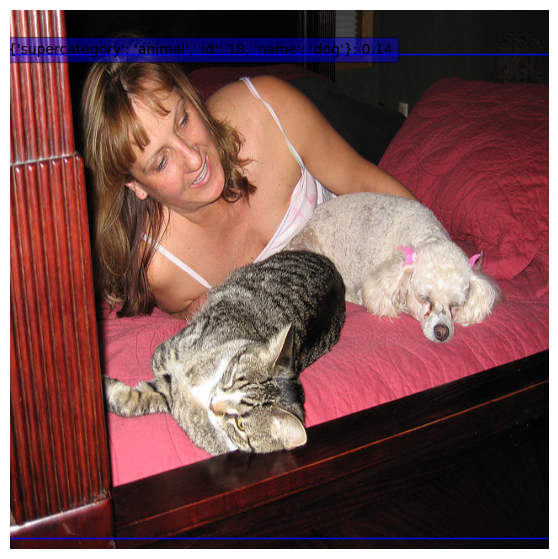

[0.0903814  0.00728027 0.0040817  0.0082605  0.00162294 0.00673313
 0.0028326  0.00066206 0.0033061  0.00282412 0.00725469 0.00578256
 0.00544869 0.00211817 0.00445376 0.19124652 0.1847494  0.0038514
 0.00109462 0.00437276 0.01203813 0.00307566 0.00182163 0.00416459
 0.00177161 0.00143852 0.00191928 0.00175526 0.00148074 0.00268305
 0.00294677 0.0123373  0.00099854 0.00326452 0.00346601 0.00237086
 0.00243044 0.00178366 0.00425504 0.00695121 0.00171975 0.00157332
 0.0030887  0.00139925 0.00281044 0.00272882 0.00208848 0.00133495
 0.00680413 0.00139046 0.00505163 0.0093592  0.00329942 0.00362265
 0.00456265 0.00334686 0.00179504 0.14237478 0.1036423  0.02330777
 0.00195643 0.00308552 0.0036543  0.00243743 0.00193085 0.00270329
 0.00411627 0.00248254 0.00290423 0.00196094 0.00525602 0.00513825
 0.00235126 0.00125207 0.00462638 0.00271605 0.00337179 0.00482085
 0.00064177 0.00598295]
1.0


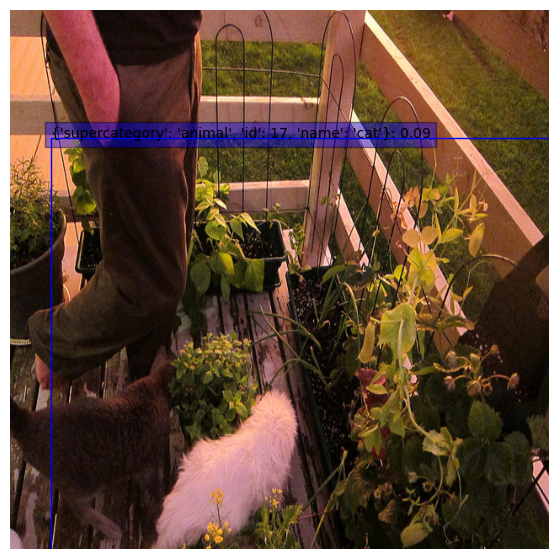

[0.12305272 0.00260556 0.00459422 0.00362513 0.01095163 0.00500387
 0.00428387 0.01201369 0.00539168 0.00618532 0.00384125 0.00614246
 0.01282967 0.00617421 0.00290453 0.11284311 0.19380258 0.00418509
 0.0104595  0.00725099 0.00210917 0.00563204 0.00657016 0.00358663
 0.00740583 0.02409462 0.00324819 0.00538107 0.00540047 0.00578152
 0.00206477 0.00206858 0.00910519 0.0039063  0.00861411 0.00719571
 0.00307637 0.00378515 0.01350393 0.00573801 0.00471865 0.00318339
 0.00094008 0.00777648 0.00155586 0.00816215 0.00514562 0.00670121
 0.01071851 0.00919696 0.00338285 0.00538906 0.00249286 0.00480941
 0.00406727 0.00168819 0.00308537 0.02247942 0.05277266 0.02984111
 0.00688537 0.01403364 0.00843475 0.00615745 0.00596142 0.00701602
 0.00500355 0.00334259 0.00346089 0.00295879 0.00369133 0.01847588
 0.00524667 0.00605271 0.00588765 0.00337404 0.01327241 0.00744375
 0.00447775 0.01430738]
1.0


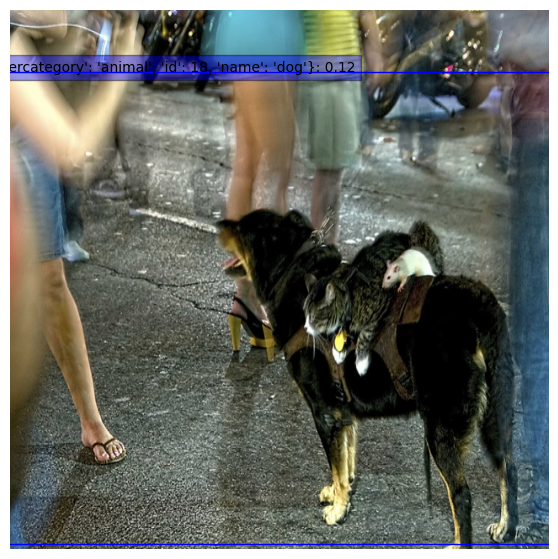

[0.12037095 0.00258029 0.00466901 0.00361323 0.01068906 0.00501008
 0.00431092 0.01232969 0.00557809 0.00604836 0.00384592 0.00646422
 0.01299745 0.00615846 0.00300154 0.11520564 0.18743147 0.00412674
 0.01119673 0.00743937 0.0021392  0.00566321 0.00670176 0.00360898
 0.00758384 0.02319521 0.00330047 0.00552019 0.00527853 0.00591532
 0.00203981 0.00209684 0.0094594  0.00398375 0.00888065 0.00732038
 0.00313265 0.00373944 0.0137045  0.0059336  0.0048464  0.00333549
 0.00094078 0.00771106 0.00156469 0.00824488 0.0053885  0.0066169
 0.01090596 0.00968079 0.00331372 0.00557127 0.00254781 0.00479695
 0.00407348 0.00167157 0.00313001 0.02193396 0.05310701 0.03106649
 0.00713393 0.01377043 0.00825724 0.00637539 0.00597963 0.00708523
 0.00522326 0.00343128 0.00362769 0.00298946 0.00375634 0.01884598
 0.00531395 0.00630417 0.00586706 0.00354413 0.01315958 0.00739799
 0.00471809 0.01450651]
1.0


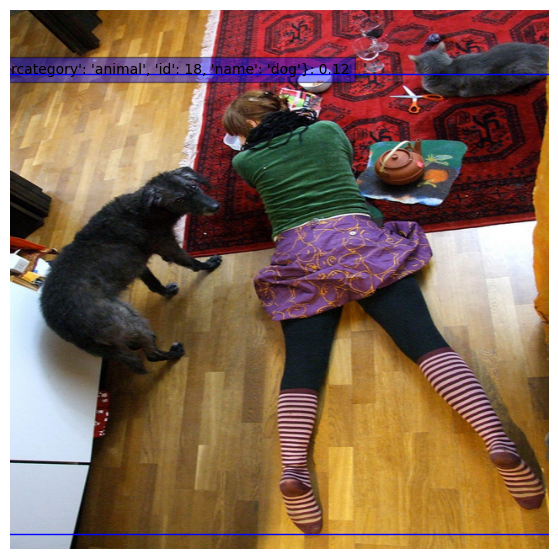

[0.11407641 0.00295905 0.00496543 0.00425721 0.01253931 0.00568819
 0.00538593 0.01241813 0.00556201 0.00784478 0.00518595 0.0064883
 0.01535122 0.00669893 0.00405308 0.08380371 0.18387684 0.00577636
 0.01106378 0.00812403 0.00245455 0.00698752 0.00632834 0.00441542
 0.00734123 0.02574521 0.0039968  0.00572573 0.00625669 0.00651805
 0.00263966 0.00280687 0.00906134 0.00459071 0.01000683 0.00834312
 0.0040759  0.0051597  0.01402198 0.00680233 0.00508054 0.00388495
 0.00114022 0.00854224 0.00211732 0.0092125  0.00596957 0.00745246
 0.01220098 0.00934325 0.00471526 0.00609346 0.00298573 0.00552891
 0.00494984 0.00211398 0.00367302 0.02169252 0.04606863 0.02329865
 0.00876844 0.01634627 0.00992049 0.00667058 0.00752942 0.00784004
 0.00532182 0.00430694 0.00368702 0.00395034 0.00421314 0.01903101
 0.00613827 0.00709662 0.00622616 0.0037082  0.01379498 0.00871194
 0.00551606 0.01576166]
1.0


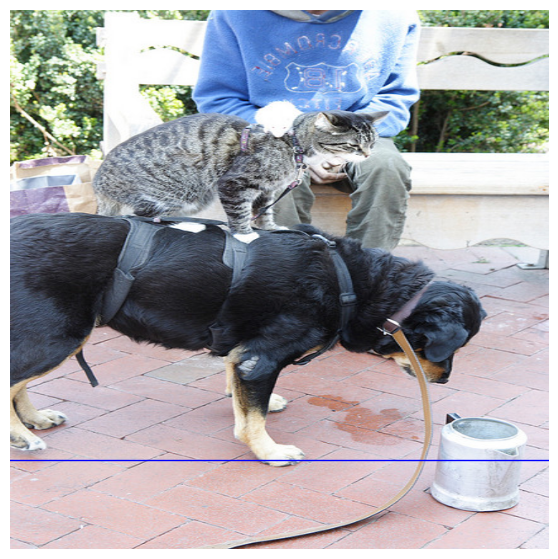

[0.11516397 0.00276784 0.00490621 0.00382539 0.01101605 0.0053149
 0.00448134 0.01258235 0.00583243 0.00635521 0.00401709 0.00679103
 0.0130532  0.00638053 0.00332056 0.11047993 0.1800728  0.00435827
 0.01151854 0.00769612 0.00225073 0.00611772 0.00703277 0.0037878
 0.00778554 0.02363103 0.00348787 0.00577773 0.00557177 0.00613587
 0.00219449 0.0022847  0.00982194 0.00409371 0.00924841 0.00776573
 0.00338759 0.00397906 0.01410017 0.00620088 0.00504543 0.00357268
 0.00101374 0.00814523 0.00171258 0.0085136  0.00563544 0.00687962
 0.01122324 0.00992235 0.00351558 0.00588794 0.00271122 0.00506455
 0.00429122 0.0017943  0.00337922 0.02244067 0.05104378 0.03079656
 0.00748548 0.01390347 0.00865281 0.00655276 0.00629232 0.00736353
 0.00549669 0.00367746 0.0037776  0.00321746 0.00391081 0.01903289
 0.00565069 0.00665769 0.00611096 0.00377669 0.01368723 0.00769991
 0.00503926 0.01483607]
1.0


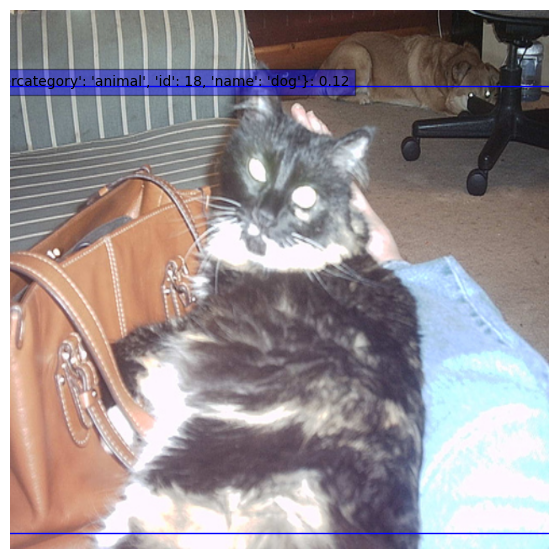

[0.12351561 0.0025533  0.00460795 0.0036449  0.01089778 0.00497607
 0.00433346 0.01225714 0.00547431 0.0062721  0.00395449 0.00623246
 0.01317534 0.00604313 0.00303974 0.11199535 0.18856171 0.00420832
 0.01098435 0.00737878 0.00210167 0.00580148 0.00658734 0.00357109
 0.00746519 0.0238518  0.00328102 0.00548771 0.00531135 0.00597538
 0.00202277 0.00207785 0.00930214 0.00396198 0.00878526 0.00746542
 0.00313839 0.00379096 0.01371385 0.00588348 0.0048073  0.00329242
 0.00093418 0.00790596 0.00155304 0.00840154 0.00526805 0.00659146
 0.01103667 0.00967991 0.0033313  0.00552047 0.00248962 0.00475979
 0.00409363 0.00165478 0.00312135 0.02178498 0.05234063 0.02980387
 0.00719088 0.01399925 0.00838676 0.00635358 0.00605682 0.00713341
 0.00502433 0.00343029 0.00356786 0.00305501 0.00370469 0.01876676
 0.00540669 0.00623522 0.00586666 0.00348937 0.01315057 0.00757617
 0.00475197 0.01480028]
0.9999999


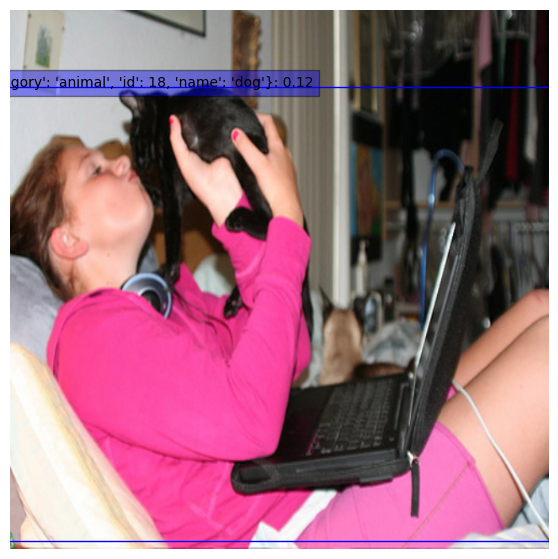

In [ ]:
for sample in train_dataset.take(25):

    image = tf.cast(sample["image"], dtype=tf.float32)


    input_image, ratio = prepare_image(image)
    detections = model.predict(input_image)

    boxes = np.asarray(detections["boxes"])

    cls_prob = np.asarray(detections["cls_prob"])


    if (len(cls_prob[0]) < 1):
        continue

    print(cls_prob[0][0])
    print(np.sum(cls_prob[0][0]))

    cls_id = np.asarray(detections["cls_idx"])

    key_list = list(coco_ds.coco.cats.keys())

    
    cls_name = [coco_ds.coco.cats[key_list[x]] for x in cls_id[0]]


    scaled_bb = []
    
    lbl_name = [coco_ds.coco.cats[key_list[x]] for x in np.asarray(sample["objects"]["label"])]

    # for box in sample["objects"]["bbox"]:

    #     print(box)
    #     scaled_bb.append(yxyx_percent_to_xywh(box, np.asarray(sample["image"]).shape))
                            
    visualize_detections(image, boxes[0], cls_name, cls_prob[0][0])

    #tru_cls = list(np.asarray(sample["objects"]["label"]))

    #print(scaled_bb)

    #visualize_detections_and_gt(image, boxes[0], cls_name, cls_prob[0][0], scaled_bb, tru_cls)